In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical

import logging
import warnings

# Suppress matplotlib font warnings
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

# Optional: suppress all warnings
warnings.filterwarnings("ignore")



In [2]:
my_data = pd.read_csv('/content/A_Z Handwritten Data.csv').astype('float32')
my_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
my_frame = pd.DataFrame(my_data)
my_frame.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
my_frame.shape
my_frame.info()
my_frame.describe()
my_frame.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB


,0
0,0
0.1,0
0.2,0
0.3,0
0.4,0
...,...
0.644,0
0.645,0
0.646,0
0.647,0


In [5]:
x = my_frame.drop('0', axis = 1)
y = my_frame['0']

In [6]:
# we are reshaping the train & test image data so that they can be displayed as an image,
# as initially in the CSV file they were present as 784 columns of pixel data. So we convert it to 28×28 pixels.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

print('Train Data Shape:', x_train.shape)
print('Test Data Shape:', x_test.shape)

Train Data Shape: (297960, 28, 28)
Test Data Shape: (74490, 28, 28)


In [7]:
# All the labels are present in the form of floating point values, that we convert to integer values,
# & so we create a dictionary word_dict to map the integer values with the characters.

word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

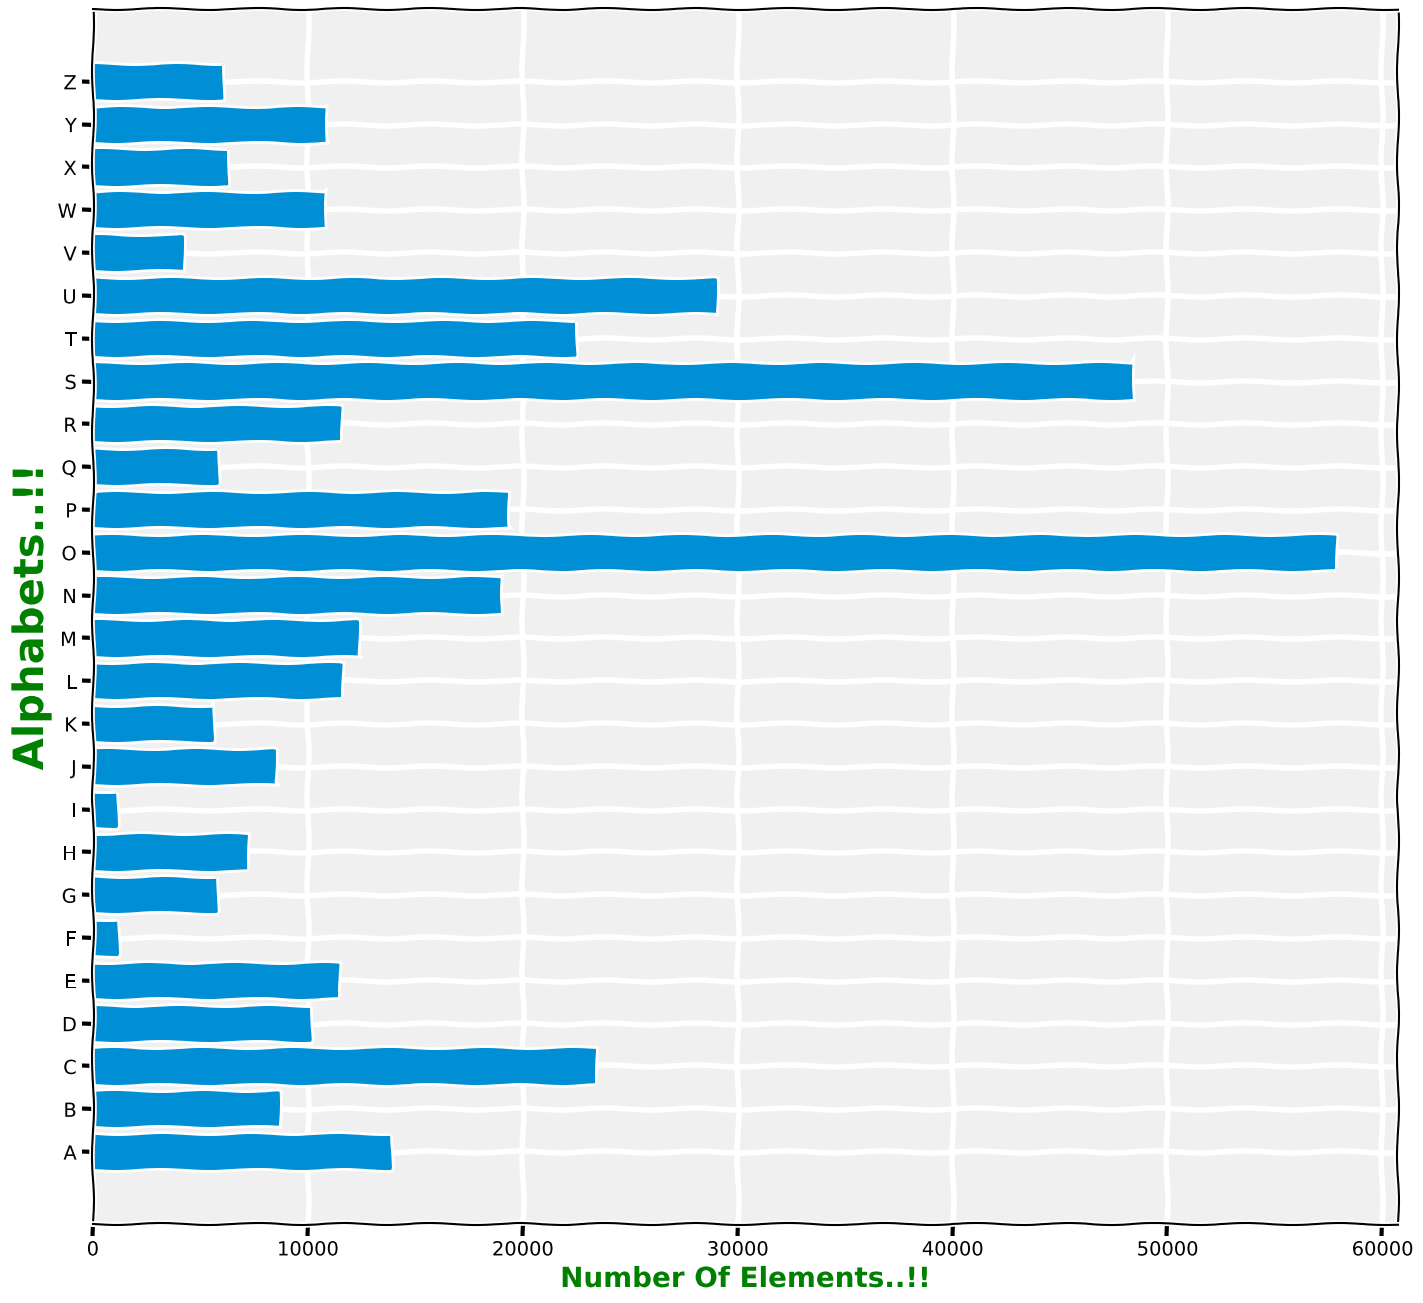

In [8]:
# Plotting the number of alphabets in the dataset
# 1): Firstly we convert the labels into integer values and append into the count list according to the label.
#     This count list has the number of images present in the dataset belonging to each alphabet.
# 2): Now we create a list – alphabets containing all the characters using the values() function of the dictionary.
# 3): Now using the count & alphabets lists we draw the horizontal bar plot.

plt.style.use('fivethirtyeight')
plt.xkcd()

y_integer = np.array(y, dtype=np.int64)

count = np.zeros(26, dtype = 'int')

for i in y_integer:
    count[i] += 1

alphabets = []

for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1, 1, figsize = (15, 15))
ax.barh(alphabets, count)

plt.xlabel('Number Of Elements..!!', fontsize = 20, fontweight = 'bold', color = 'green')
plt.ylabel('Alphabets..!!', fontsize = 30, fontweight = 'bold', color = 'green')
plt.grid()
plt.show()

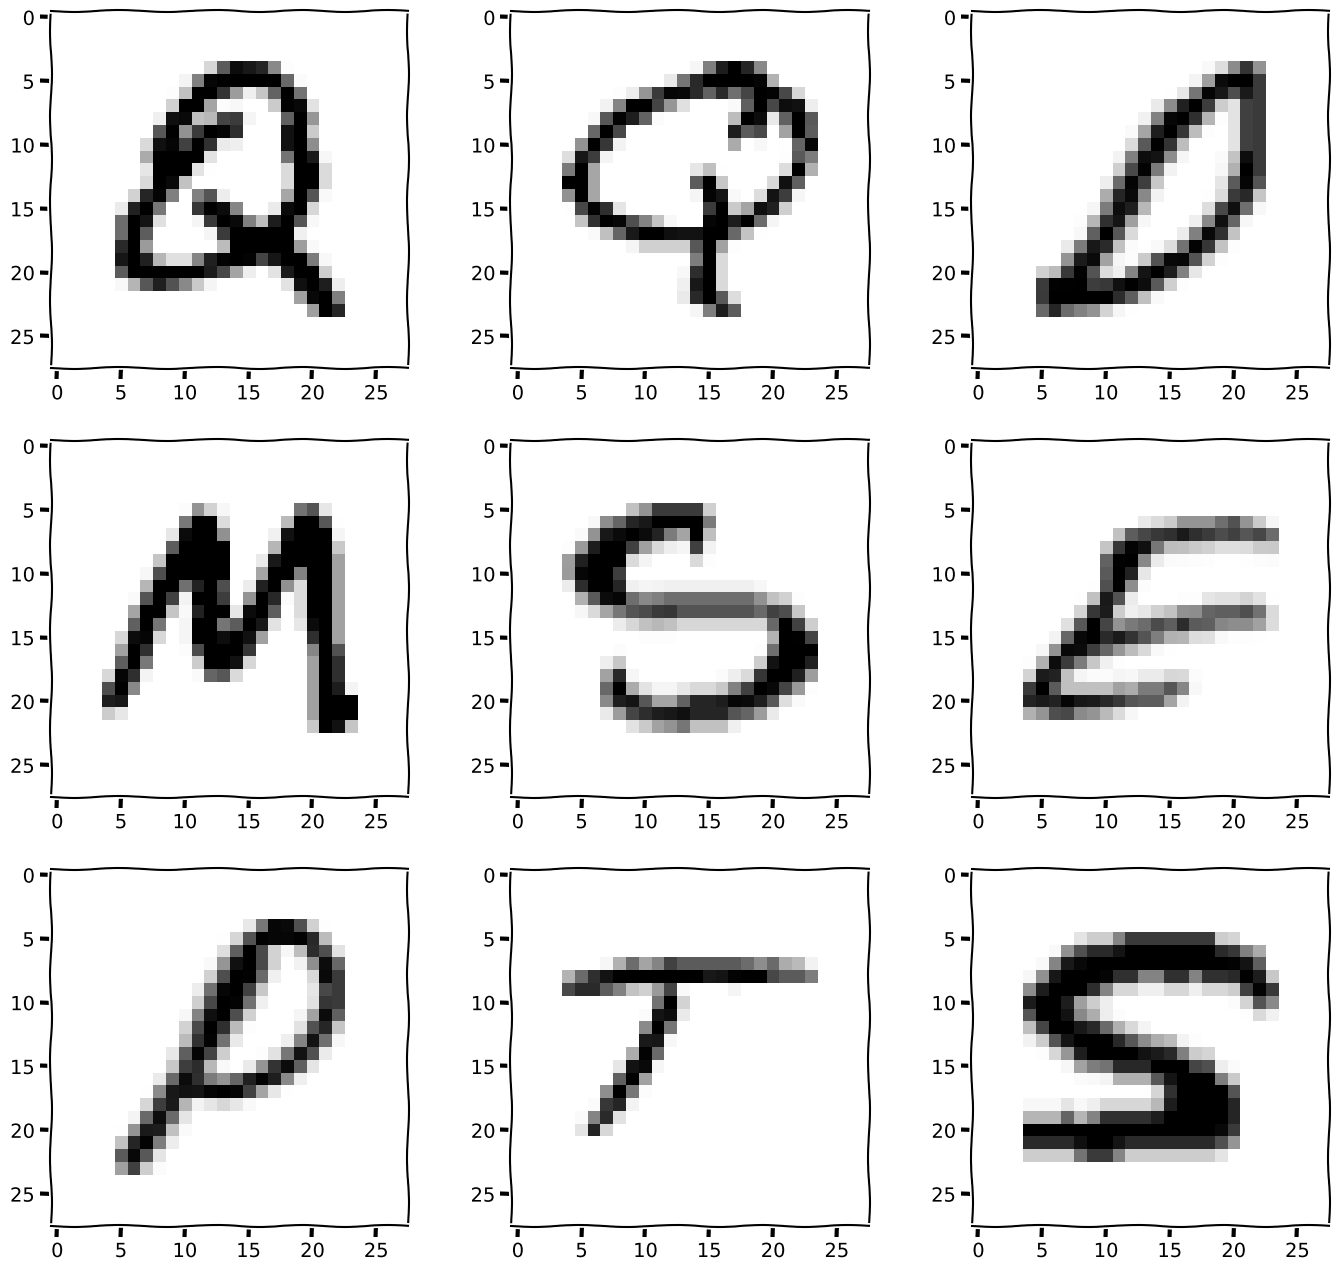

In [9]:
# Now we shuffle the data with the shuffle() function to show the random images..

plt.style.use('fivethirtyeight')
plt.xkcd()

shuff = shuffle(x_train[:100])
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
axes = ax.flatten()

for i in range(9):
    shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28, 28)), cmap = 'Greys')
plt.show()

In [10]:
# Reshaping the training & test dataset so that it can be put in the model
# Now we reshape the train & test image dataset so that they can be put in the model.
# New shape of train data: (297960, 28, 28, 1)
# New shape of test data: (74490, 28, 28, 1)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print("New shape of train data:", x_train.shape)

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print("New shape of test data:", x_test.shape)

New shape of train data: (297960, 28, 28, 1)
New shape of test data: (74490, 28, 28, 1)


In [11]:
# Here we convert the single float values to categorical values.
# This is done as the CNN model takes input of labels & generates the output as a vector of probabilities.

# What is CNN?
#   CNN stands for Convolutional Neural Networks
#   that are used to extract the features of the images using several layers of filters.

categorical_train = to_categorical(y_train, num_classes = 26)
print("New shape of train labels:", categorical_train.shape)

categorical_test = to_categorical(y_test, num_classes = 26)
print("New shape of test labels:", categorical_test.shape)

New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


In [12]:
# We have the Sequential model that we designed for training the model over the training dataset.
# The model created is as follows:

# Sequential() Model: A Sequential model is appropriate for a plain stack of layers
# where each layer has exactly one input tensor and one output tensor.

# MaxPool2D: The input along its spatial dimensions (height and width) by taking the maximum value over an input window
#(of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.

my_model = Sequential()

my_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'valid'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Flatten())

my_model.add(Dense(64, activation = "relu"))
my_model.add(Dense(128, activation = "relu"))

my_model.add(Dense(26, activation = "softmax"))

In [13]:
# 1): Here we are compiling the model, where we define the optimizing function & the loss function to be used for fitting.
# 2): The optimizing function used is Adam, that is a combination of RMSprop & Adagram optimizing algorithms.
# 3): The dataset is very large so we are training for only a single epoch,
#     however, as required we can even train it for multiple epochs
#     (which is recommended for character recognition for better accuracy).

my_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = my_model.fit(x_train, categorical_train, epochs = 1, validation_data = (x_test, categorical_test))

9312/9312 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.9076 - loss: 0.3455 - val_accuracy: 0.9756 - val_loss: 0.0903


In [14]:
# Now we are getting the model summary that tells us what were the different layers defined in the model &
# also we save the model using model.save() function.

my_model.summary()
my_model.save(r'model_hand.h5')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,536 (1.57 MB)

 Trainable params: 137,178 (535.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 274,358 (1.05 MB)

In [15]:
# we print out the training & validation accuracies along with the training & validation losses for character recognition.

print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9756208658218384]
The training accuracy is : [0.9552825689315796]
The validation loss is : [0.09031268954277039]
The training loss is : [0.15818801522254944]


2328/2328 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


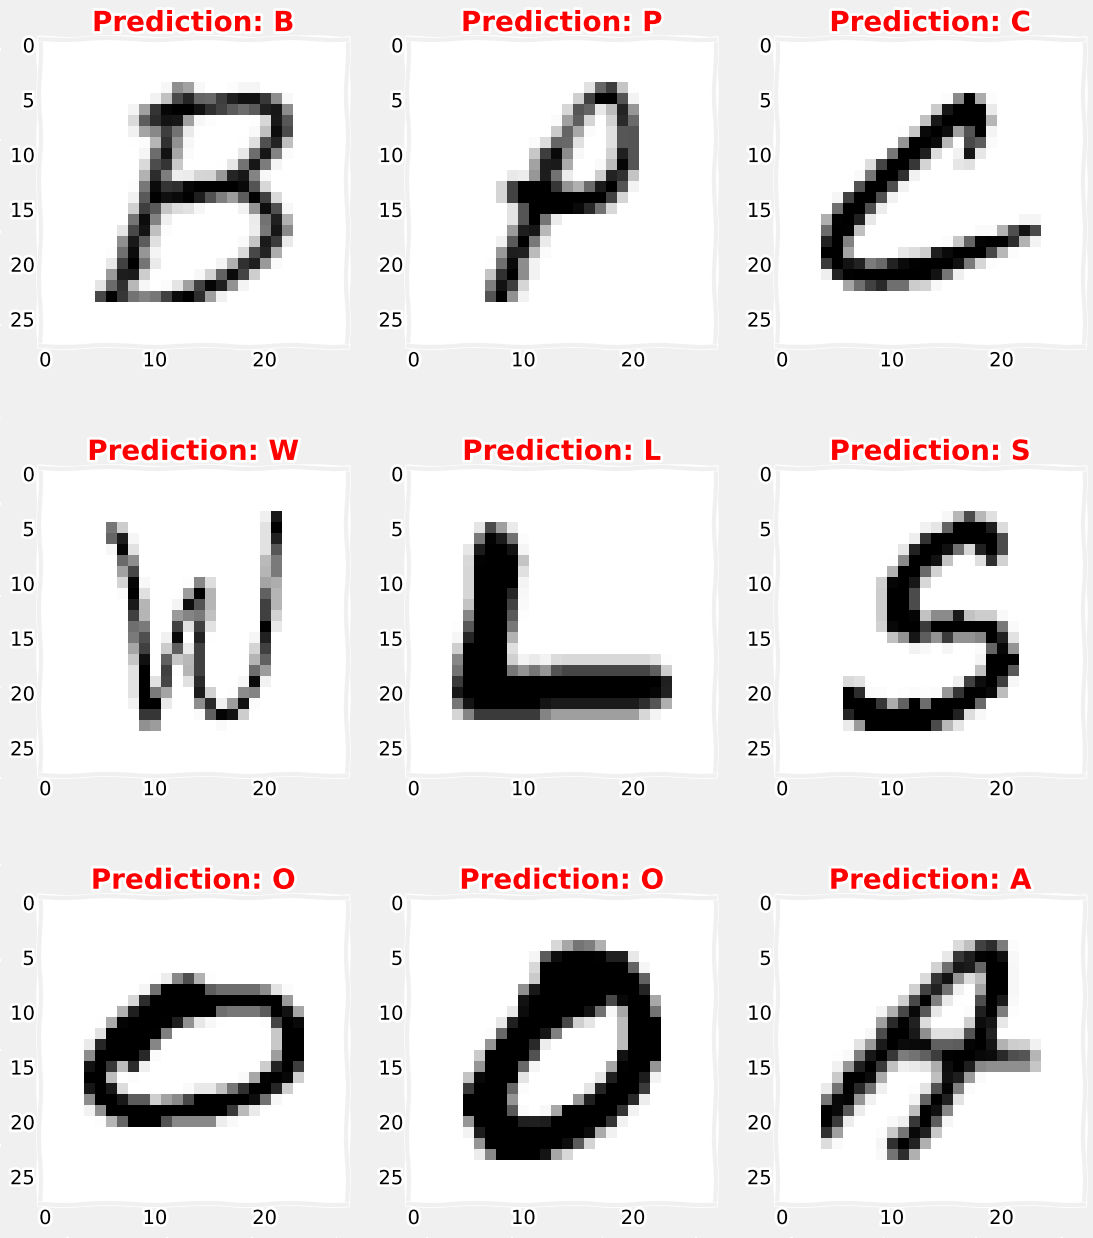

In [16]:
# Here we are creating 9 subplots of (3,3) shape & visualize some of the test dataset alphabets along with their predictions,
# that are made using the model.predict() function for text recognition.

plt.style.use('fivethirtyeight')

# Make prediction from the right model
prediction = my_model.predict(x_test)

# Create 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 15))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(x_test[i], (28, 28))
    ax.imshow(img, cmap='Greys')

    pred_label = word_dict[np.argmax(prediction[i])]
    ax.set_title("Prediction: " + pred_label, fontsize=20, fontweight='bold', color='red')
    ax.grid()